##### **This file intends to show some basic graphs for future analysis and better understanding of the dataset**
<span style="color: #FFB6C1;">please make sure you have started and selected the correct python interpreter (venv) before running this file <span>
- start your venv env using .\venv\Scripts\activate
- make sure you've installed all requirements.txt
- select correct env in the IDE (top right corner for VSC)
- if "venv" doesn not appear try selecting manually .\venv\Scripts\python.exe
- if it still does not work, try python -m ipykernel install --user --name venv --display-name "Python venv" and try repeating previous step

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mon - Usual traffic
# Tue - Brute Force, FTP-Patator, SSH-Patator
# Wed - DoS/DDoS attacks
# Thu_1 (Morning) - Web attacks (SQL Injection, XSS, etc.)
# Thu_2 (Afternoon) - Infiltration, Meta Exploit
# Fri_1 (Morning) - Botnet
# Fri_2 (Afternoon) - PortScan
# Fri_3 (Afternoon) - DDoS LOIT (LOIC?)
datasets = {
    "Mon": "../data/Monday-WorkingHours.pcap_ISCX.csv",
    "Tue": "../data/Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wed": "../data/Wednesday-workingHours.pcap_ISCX.csv",
    "Thu_1": "../data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thu_2": "../data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Fri_1": "../data/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Fri_2": "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Fri_3": "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
}

In [7]:
df = pd.read_csv(datasets["Mon"])
df.columns = df.columns.str.strip()
df.info()

rows_count = df.shape[0]
clean_df = df.dropna()
print(f"Rows dropped {rows_count - clean_df.shape[0]}")
print(f"Rows after cleaning: {clean_df.shape[0]}")
print(clean_df['Label'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             529918 non-null  int64  
 1   Flow Duration                529918 non-null  int64  
 2   Total Fwd Packets            529918 non-null  int64  
 3   Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets  529918 non-null  int64  
 5   Total Length of Bwd Packets  529918 non-null  int64  
 6   Fwd Packet Length Max        529918 non-null  int64  
 7   Fwd Packet Length Min        529918 non-null  int64  
 8   Fwd Packet Length Mean       529918 non-null  float64
 9   Fwd Packet Length Std        529918 non-null  float64
 10  Bwd Packet Length Max        529918 non-null  int64  
 11  Bwd Packet Length Min        529918 non-null  int64  
 12  Bwd Packet Length Mean       529918 non-null  float64
 13 

### 1. Dataset Overview

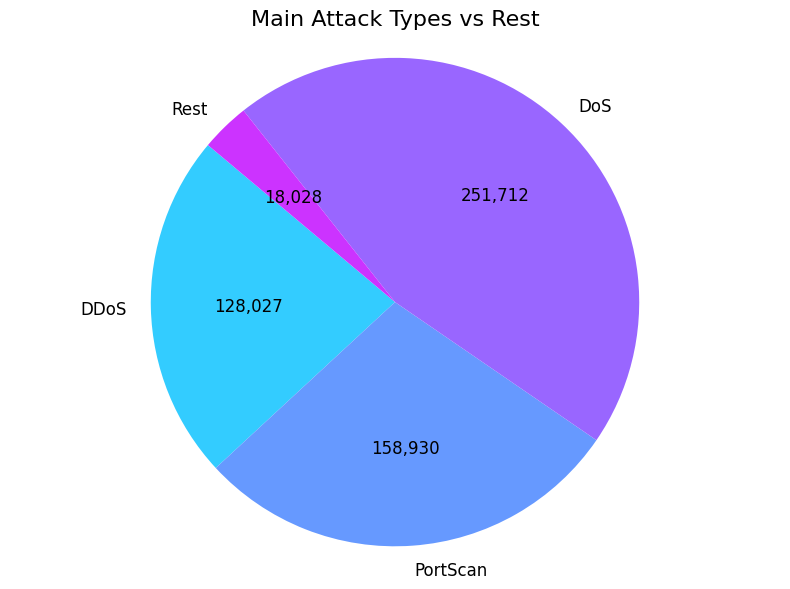

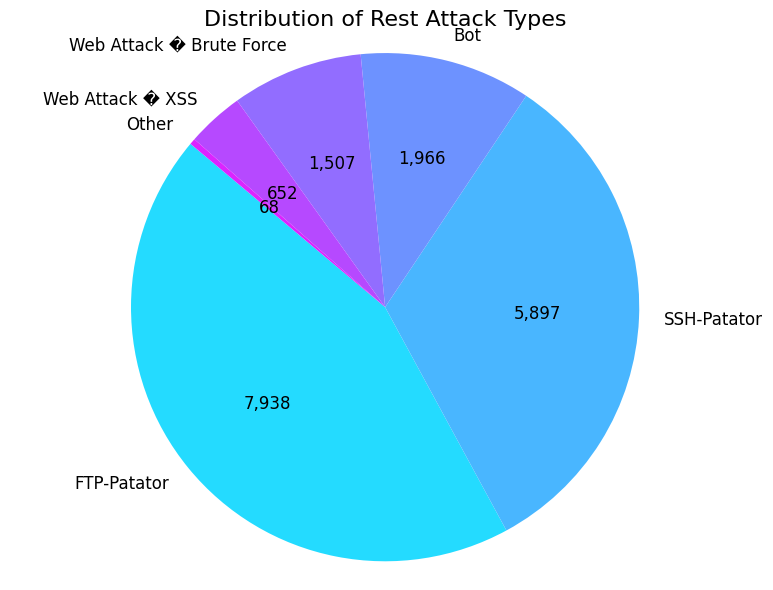

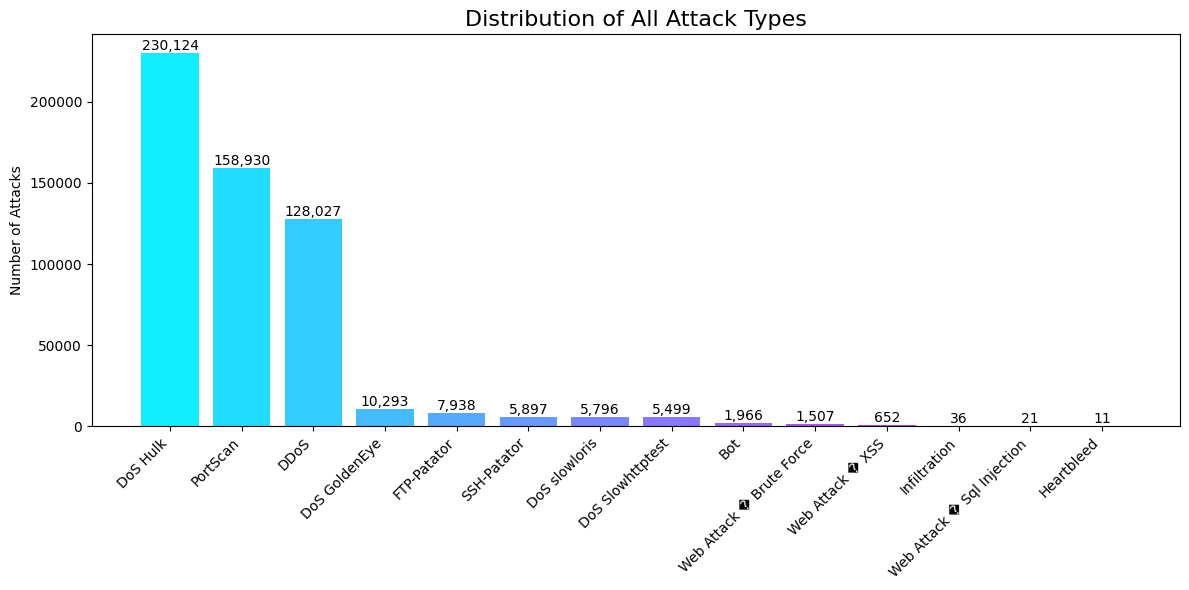

In [22]:
from collections import defaultdict

attack_counts = defaultdict(int)
dos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest']
main_attacks = ['DDoS', 'PortScan', 'DoS']

for day, path in datasets.items():
    day_df = pd.read_csv(path)
    day_df.columns = day_df.columns.str.strip()
    clean_day_df = day_df.dropna()
    labels = clean_day_df['Label'].unique()
    for label in labels:
        if label != 'BENIGN':
            count = clean_day_df[clean_day_df['Label'] == label].shape[0]
            attack_counts[label] += count

sorted_attack_counts = dict()
for k in sorted(attack_counts, key=attack_counts.get, reverse=True):
    sorted_attack_counts[k] = attack_counts[k]

dos_total = 0
for dos_label in dos_attacks:
    dos_total += sorted_attack_counts.get(dos_label, 0)

main_counts = {
    'DDoS': sorted_attack_counts.get('DDoS', 0),
    'PortScan': sorted_attack_counts.get('PortScan', 0),
    'DoS': dos_total
}

rest_counts = {}
for k, v in sorted_attack_counts.items():
    if k not in main_attacks and k not in dos_attacks:
        rest_counts[k] = v
main_counts['Rest'] = sum(rest_counts.values())

# Chart 1: Main attacks
plt.figure(figsize=(8, 6))
colors_main = sns.color_palette('cool', len(main_counts))
patches1, texts1, autotexts1 = plt.pie(
    list(main_counts.values()),
    labels=list(main_counts.keys()),
    autopct=lambda pct: f"{int(pct/100.*sum(main_counts.values())):,}",
    startangle=140,
    colors=colors_main,
    textprops={'fontsize': 12}
)
plt.title('Main Attack Types vs Rest', fontsize=16)
plt.axis('equal')
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 2: Less prominent attacks
grouped_rest = {}
other_total = 0
for k, v in rest_counts.items():
    if v < 100:
        other_total += v
    else:
        grouped_rest[k] = v
if other_total > 0:
    grouped_rest['Other'] = other_total

plt.figure(figsize=(8, 6))
colors_rest = sns.color_palette('cool', len(grouped_rest))
patches2, texts2, autotexts2 = plt.pie(
    grouped_rest.values(),
    labels=grouped_rest.keys(),
    autopct=lambda pct: f"{int(pct/100.*sum(grouped_rest.values())):,}",
    startangle=140,
    colors=colors_rest,
    textprops={'fontsize': 12}
)
plt.title('Distribution of Rest Attack Types', fontsize=16)
plt.axis('equal')
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 3: all attacks
plt.figure(figsize=(12, 6))
colors_all = sns.color_palette('cool', len(sorted_attack_counts))
bars = plt.bar(sorted_attack_counts.keys(), sorted_attack_counts.values(), color=colors_all)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Attacks')
plt.title('Distribution of All Attack Types', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

